In [4]:
import imutils
import cv2
import sys

In [5]:
import cv2
import time
from cv2 import aruco
from imutils.perspective import order_points
import math

In [6]:
import matplotlib.pyplot as plt

In [13]:
# Setup the aruco marker detection
#aruco_dict = aruco.Dictionary_get(aruco.DICT_ARUCO_ORIGINAL)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
# aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

aruco_params = aruco.DetectorParameters_create()

In [17]:
#frame = cv2.imread('./aruco_car3.png')
#frame = cv2.imread("aruco_model_cars_1.jpeg")
frame = cv2.imread("aruco_model_cars_2.jpeg")
print(f"Before Resize: {frame.shape} (Height (y), Width (x)")
frame = imutils.resize(frame, width=800)
original = frame.copy()
print(f"After Resize: {frame.shape} (Height (y), Width (x)")

#image, marker_details = detect_markers_in_image(frame, draw_center=True, draw_reference_corner=True, target_id=None)


Before Resize: (2048, 1536, 3) (Height (y), Width (x)
After Resize: (1066, 800, 3) (Height (y), Width (x)


In [18]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)

In [19]:
print ("number of aruco markers found:",  len(ids) )

number of aruco markers found: 12


In [11]:
# Pipeline
def countArucoMarkedParkingSpaces(image,aruco_dict,aruco_params ):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)
    return len(ids)

Free Spaces: 12


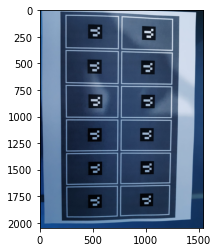

In [13]:
frame = cv2.imread("aruco_model_cars_2.jpeg")
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
aruco_params = aruco.DetectorParameters_create()

free_spaces = countArucoMarkedParkingSpaces(frame,aruco_dict, aruco_params)
print('Free Spaces:', free_spaces)
plt.imshow(frame)

In [19]:
font = cv2.FONT_HERSHEY_SIMPLEX
textCoordinates=(500,200)
# fontScale 
fontScale = 3
# Red color in BGR 
color = (0, 0, 255) 
# Line thickness of 2 px 
thickness = 2

Free Spaces: 8


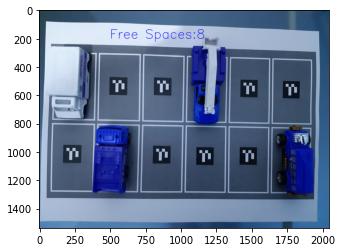

In [20]:
frame = cv2.imread("aruco_model_cars_1.jpeg")
free_spaces = countArucoMarkedParkingSpaces(frame,aruco_dict, aruco_params)
print('Free Spaces:', free_spaces)
cv2.putText(frame,"Free Spaces:{}".format(free_spaces),textCoordinates,font, fontScale,color,thickness,cv2.LINE_AA,False)
plt.imshow(frame, cmap='gray')